In [93]:
import pandas as pd
import quandl, math
import numpy as np
from sklearn import preprocessing,  svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from scipy import stats

In [90]:
df = quandl.get("WIKI/GOOGL")

In [91]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [94]:
df = df.select_dtypes(exclude = ['object'])
df = df.select_dtypes(exclude = ['category'])

df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]  # .astype(np.float64) ?
df.dropna(0,inplace=True)

label = "Adj. Volume"

l = df.columns

j = []
for i in l:
    pearson_coef,p_value = stats.pearsonr(df[i],df[label])
    if 1 > pearson_coef > 0.85:
        j.append(i)
        print("Pearson Coef of ",pearson_coef, "of", i, "is greater than 0.85")
    else:
        print("Pearson Coef of ",pearson_coef , "of", i) 
        
df.drop(j,axis=1)

Pearson Coef of  -0.552175153505426 of Open
Pearson Coef of  -0.5489853447246398 of High
Pearson Coef of  -0.5577960794212009 of Low
Pearson Coef of  -0.5537779967582259 of Close
Pearson Coef of  0.9999999999999998 of Volume is greater than 0.85
Pearson Coef of  -0.007876157804649241 of Ex-Dividend
Pearson Coef of  nan of Split Ratio
Pearson Coef of  -0.549529070201729 of Adj. Open
Pearson Coef of  -0.5479429950135168 of Adj. High
Pearson Coef of  -0.5522691650864222 of Adj. Low
Pearson Coef of  -0.5502640659087776 of Adj. Close
Pearson Coef of  0.9999999999999998 of Adj. Volume is greater than 0.85


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Open,High,Low,Close,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close
Date,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,0.0,1.0,50.159839,52.191109,48.128568,50.322842
2004-08-20,101.01,109.08,100.50,108.310,0.0,1.0,50.661387,54.708881,50.405597,54.322689
2004-08-23,110.76,113.48,109.05,109.400,0.0,1.0,55.551482,56.915693,54.693835,54.869377
2004-08-24,111.24,111.60,103.57,104.870,0.0,1.0,55.792225,55.972783,51.945350,52.597363
2004-08-25,104.76,108.00,103.88,106.000,0.0,1.0,52.542193,54.167209,52.100830,53.164113
...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.57,1108.70,1087.21,1094.000,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000
2018-03-22,1080.01,1083.92,1049.64,1053.150,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000
2018-03-23,1051.37,1066.78,1024.87,1026.550,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000


In [51]:
df1 = df[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]

In [52]:
df1.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [53]:
df.shape

(3424, 12)

In [54]:
df1["HL_PCT"] = (df1['Adj. High']-df1['Adj. Close']) / df1["Adj. Close"] * 100
df1["PCT_change"] = (df1["Adj. Close"] - df1["Adj. Open"]) / df1['Adj. Open'] * 100
df = df1[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
df.head(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [56]:
a= 0.01*len(df)
a

34.24

In [57]:
int(math.ceil(a))

35

In [58]:
forecast_col = "Adj. Close"
forecast_out = int(math.ceil(a))
df["label"] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,0.896914,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,0.346805,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,0.495942,0.476195,2774967.0,1026.550000


In [59]:
X = np.array(df.drop(['label'],1))
X[0:5]

array([[ 5.03228418e+01,  3.71256291e+00,  3.24967503e-01,
         4.46590000e+07],
       [ 5.43226889e+01,  7.10922353e-01,  7.22700723e+00,
         2.28343000e+07],
       [ 5.48693765e+01,  3.72943327e+00, -1.22788010e+00,
         1.82561000e+07],
       [ 5.25973630e+01,  6.41746925e+00, -5.72635743e+00,
         1.52473000e+07],
       [ 5.31641125e+01,  1.88679245e+00,  1.18365788e+00,
         9.18860000e+06]])

In [61]:
X_lately = X[-forecast_out:]
X_lately

array([[ 1.05747000e+03,  9.08772826e-01,  1.87590598e-01,
         1.53150400e+06],
       [ 1.07200000e+03,  3.03171642e-01,  7.72716163e-01,
         3.08073800e+06],
       [ 1.08509000e+03,  1.29021556e-01,  8.02638302e-01,
         1.48276800e+06],
       [ 1.07978000e+03,  4.80653466e-01, -2.99163450e-01,
         1.28793000e+06],
       [ 1.07356000e+03,  7.14445397e-01, -6.80901454e-01,
         1.42903500e+06],
       [ 1.07085000e+03,  6.22869683e-01, -4.22172421e-01,
         1.21101200e+06],
       [ 1.06886000e+03,  2.67574799e-01, -1.06542056e-01,
         8.60800000e+05],
       [ 1.06585000e+03,  2.82403715e-01, -2.61079503e-01,
         9.14574000e+05],
       [ 1.06020000e+03,  7.61177136e-01, -6.00037502e-01,
         1.02763400e+06],
       [ 1.05595000e+03,  8.41895923e-01, -5.93080725e-01,
         9.82285000e+05],
       [ 1.05340000e+03,  4.41427758e-01, -1.98012298e-01,
         1.15635700e+06],
       [ 1.07321000e+03,  2.58104192e-01,  1.91734250e+00,
      

In [62]:
y = np.array(df["label"])
y[0:5]

array([69.0782379 , 67.83941377, 68.91272699, 70.6681458 , 71.21984885])

In [63]:
X =preprocessing.scale(X)
y = np.array(df["label"])

print(len(X),len(y))

3389 3389


In [16]:
X_train ,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [64]:
print("size of training set:", len(X_train))
print("size of testing set:", len(X_test))

size of training set: 2711
size of testing set: 678


In [18]:
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Intercept:" , clf.intercept_)
print("Coefficient:" , clf.coef_)
print("Accuracy:" , accuracy*100)

Intercept: 412.7242775836069
Coefficient: [252.46379955  -1.41407289  -0.48816569  -2.08668045]
Accuracy: 97.82803335519093


In [65]:
clf1 = svm.SVR()
clf1.fit(X_train,y_train)
print(clf1.score(X_test,y_test))

/usr/lib/python3/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7719827721413409


In [66]:
#H = X[:-forecast_out]
#H

In [69]:
X_lately = X[-forecast_out:]
X_lately[0:10]


array([[ 2.62836772, -0.13340253,  0.14019752, -0.76716771],
       [ 2.68662975, -0.66985773,  0.53097279, -0.57983089],
       [ 2.7391177 , -0.8241238 ,  0.55095625, -0.77306097],
       [ 2.7178258 , -0.51264032, -0.18488046, -0.79662122],
       [ 2.692885  , -0.30554215, -0.43982364, -0.77955849],
       [ 2.68201851, -0.38666199, -0.26703183, -0.80592231],
       [ 2.67403906, -0.70139021, -0.05623854, -0.84827073],
       [ 2.66196963, -0.68825442, -0.15944615, -0.84176825],
       [ 2.63931441, -0.26414613, -0.38581877, -0.82809679],
       [ 2.62227286, -0.1926436 , -0.38117269, -0.83358049]])

In [70]:
clf.predict(X_lately)

array([1078.01301448, 1092.89897851, 1106.76188359, 1101.35436132,
       1094.85371072, 1092.19568674, 1090.61167828, 1087.58282507,
       1081.34545973, 1076.9511521 , 1074.69863867, 1094.19194892,
       1112.6177088 , 1117.12390257, 1132.11976717, 1136.09756229,
       1134.79225546, 1132.26831201, 1134.0792784 , 1152.52214502,
       1151.54197535, 1161.79065404, 1158.31707401, 1166.14383078,
       1186.36844362, 1198.89561876, 1193.05400082, 1205.10972737,
       1210.79124693, 1208.63718644, 1199.41035564, 1205.08082527,
       1203.7718092 , 1139.50990274, 1085.60892505])

In [71]:
df.tail(30)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-12-21,1070.85,0.622870,-0.422172,1211012.0,1054.14
2017-12-22,1068.86,0.267575,-0.106542,860800.0,1072.70
2017-12-26,1065.85,0.282404,-0.261080,914574.0,1091.36
2017-12-27,1060.20,0.761177,-0.600038,1027634.0,1095.50
2017-12-28,1055.95,0.841896,-0.593081,982285.0,1103.59
2017-12-29,1053.40,0.441428,-0.198012,1156357.0,1113.75
2018-01-02,1073.21,0.258104,1.917343,1555809.0,1109.90
2018-01-03,1091.52,0.419598,1.637909,1550593.0,1128.09
2018-01-04,1095.76,0.759290,-0.121230,1289293.0,1143.70


In [72]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)
df['Forecast'] = np.nan

[1078.01301448 1092.89897851 1106.76188359 1101.35436132 1094.85371072
 1092.19568674 1090.61167828 1087.58282507 1081.34545973 1076.9511521
 1074.69863867 1094.19194892 1112.6177088  1117.12390257 1132.11976717
 1136.09756229 1134.79225546 1132.26831201 1134.0792784  1152.52214502
 1151.54197535 1161.79065404 1158.31707401 1166.14383078 1186.36844362
 1198.89561876 1193.05400082 1205.10972737 1210.79124693 1208.63718644
 1199.41035564 1205.08082527 1203.7718092  1139.50990274 1085.60892505] 0.9782803335519092 35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
last_date = df.iloc[-1].name
last_date

Timestamp('2018-02-05 00:00:00')

In [74]:
last_unix = last_date.timestamp()
last_unix

1517788800.0

In [75]:
one_day = 86400
next_unix =  (last_unix + one_day)
next_unix

1517875200.0

In [76]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure

style.use('ggplot')

In [77]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-01-30,1177.37,0.896914,-0.029718,1792602.0,1094.00,NaN
2018-01-31,1182.22,0.346805,-0.134312,1643877.0,1053.15,NaN
2018-02-01,1181.59,0.495942,0.476195,2774967.0,1026.55,NaN
2018-02-02,1119.20,1.081129,-0.729098,5798880.0,1054.09,NaN
2018-02-05,1068.76,4.325574,-2.893850,3742469.0,1006.94,NaN


In [78]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day 
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [79]:
df.tail(10)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-03 05:30:00,NaN,NaN,NaN,NaN,NaN,1198.895619
2018-03-04 05:30:00,NaN,NaN,NaN,NaN,NaN,1193.054001
2018-03-05 05:30:00,NaN,NaN,NaN,NaN,NaN,1205.109727
2018-03-06 05:30:00,NaN,NaN,NaN,NaN,NaN,1210.791247
2018-03-07 05:30:00,NaN,NaN,NaN,NaN,NaN,1208.637186
2018-03-08 05:30:00,NaN,NaN,NaN,NaN,NaN,1199.410356
2018-03-09 05:30:00,NaN,NaN,NaN,NaN,NaN,1205.080825
2018-03-10 05:30:00,NaN,NaN,NaN,NaN,NaN,1203.771809
2018-03-11 05:30:00,NaN,NaN,NaN,NaN,NaN,1139.509903


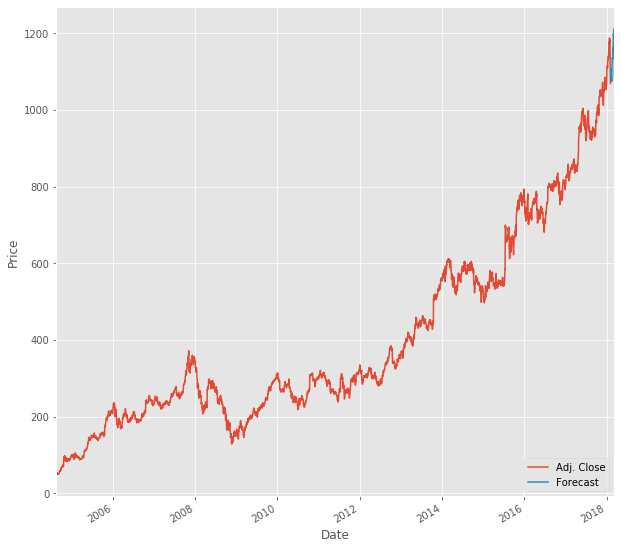

In [32]:
plt.figure(figsize = (10,10))
df['Adj. Close'].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [33]:
from statistics import mean
import random


In [35]:
# # using normal dataset
# xs = np.array([1,2,3,4,5,6] , dtype=np.float64)
# ys = np.array([5,4,6,5,6,7] , dtype=np.float64)


In [36]:
# xr = xs.reshape(1,-1)
# yr = ys.reshape(1,-1)
# gf = pd.DataFrame({"xs":xs,"ys":ys})
# lm = LinearRegression()
# h = lm.fit(xr,yr)
# h.coef_

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [80]:
def best_fit_slope_and_intercept(o,p):
    slope = ( ((mean(o) * mean(p)) - mean(o*p))/
        ((mean(o) * mean(o))-mean(o*o)))
    intercept = (mean(p)) - ((slope) * mean(o)) 
    
    return slope, intercept

In [83]:
# m,b= best_fit_slope_and_intercept(xs,ys)

# print(m,b)

1.9597110308419008 2.588524590163928


In [81]:
#creating new data set
def creating_dataset(hm, variance, step, correlation):
    val=1
    ys=[]
    for i in range(hm):
        y = val+ random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation =="pos":
            val+=step
        elif correlation and correlation =="neg":
            val-+step
    xs = [i for i in range(len(ys))]    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [82]:
xs , ys = creating_dataset(60, 10, 2, correlation = "pos")

In [41]:
# lm = LinearRegression()
# #lm.fit (gf["xs"],gf['ys'])
# lm.fit(xr,yr)
# lm.intercept_

array([5., 4., 6., 5., 6., 7.])

In [84]:
regression_line = [(m*x)+b for x in xs]

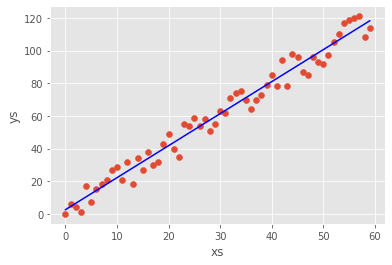

In [85]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line, color="b")
plt.xlabel("xs")
plt.ylabel("ys")
plt.show()

In [86]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)

In [87]:
def coef_of_determination(ys_orig,ys_line):
#     ys_mean_line=[]
#     for y in ys_orig:
#         ys_mean_line.append(mean(ys_orig))
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [88]:
r_squared = coef_of_determination(ys, regression_line)
print(r_squared)

0.9708476787419663


In [ ]:
#finish
